In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
df = pd.DataFrame(cities)
df = df.rename(columns = {0: "City"})

In [4]:
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dicabisagan,,,,,,,,
1,jamestown,,,,,,,,
2,punta arenas,,,,,,,,
3,hermanus,,,,,,,,
4,morondava,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
query_url = f"{url}appid={api_key}&units={units}&q="
query_url_test = f"{url}appid={api_key}&units={units}"

In [7]:
response = requests.get(query_url +"London").json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 64.36,
  'pressure': 1015,
  'humidity': 82,
  'temp_min': 62.01,
  'temp_max': 66.99},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 80},
 'rain': {'3h': 3.562},
 'clouds': {'all': 100},
 'dt': 1561330376,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0125,
  'country': 'GB',
  'sunrise': 1561261409,
  'sunset': 1561321303},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [8]:
query_url = f"{url}appid={api_key}&units={units}&q="

In [9]:
print("Beginning Data Retrieval \n ---------------------")

for index, row in df.iterrows():
    
    city_name = row["City"]

    # assemble url and make API request
    print(f"Processing Record for Index {index}: {city_name}")
    response = requests.get(query_url + city_name).json()
    
    try: 
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
              
              
print("--------------------- \nData Retrieval Complete. \n---------------------")

Beginning Data Retrieval 
 ---------------------
Processing Record for Index 0: dicabisagan
Processing Record for Index 1: jamestown
Processing Record for Index 2: punta arenas
Processing Record for Index 3: hermanus
Processing Record for Index 4: morondava
Processing Record for Index 5: new norfolk
Processing Record for Index 6: udachnyy
Processing Record for Index 7: ushuaia
Processing Record for Index 8: almazar
Processing Record for Index 9: mataura
Processing Record for Index 10: oyotun
Processing Record for Index 11: tuggurt
City not found... skipping.
Processing Record for Index 12: chandur bazar
Processing Record for Index 13: bluff
Processing Record for Index 14: lorengau
Processing Record for Index 15: taolanaro
City not found... skipping.
Processing Record for Index 16: karratha
Processing Record for Index 17: east london
Processing Record for Index 18: belushya guba
City not found... skipping.
Processing Record for Index 19: thompson
Processing Record for Index 20: abu zaba

Processing Record for Index 183: santa vitoria do palmar
Processing Record for Index 184: broome
Processing Record for Index 185: namibe
Processing Record for Index 186: bathsheba
Processing Record for Index 187: saldanha
Processing Record for Index 188: upernavik
Processing Record for Index 189: hasaki
Processing Record for Index 190: hualmay
Processing Record for Index 191: omsukchan
Processing Record for Index 192: bambous virieux
Processing Record for Index 193: rapid valley
Processing Record for Index 194: skiros
City not found... skipping.
Processing Record for Index 195: rio gallegos
Processing Record for Index 196: along
Processing Record for Index 197: ilulissat
Processing Record for Index 198: belyy yar
Processing Record for Index 199: samusu
City not found... skipping.
Processing Record for Index 200: tuatapere
Processing Record for Index 201: tumannyy
City not found... skipping.
Processing Record for Index 202: te anau
Processing Record for Index 203: kaitangata
Processing 

Processing Record for Index 364: harnai
Processing Record for Index 365: provideniya
Processing Record for Index 366: vila velha
Processing Record for Index 367: pemangkat
City not found... skipping.
Processing Record for Index 368: tombouctou
Processing Record for Index 369: kahului
Processing Record for Index 370: okha
Processing Record for Index 371: abu dhabi
Processing Record for Index 372: brae
Processing Record for Index 373: port elizabeth
Processing Record for Index 374: brisbane
Processing Record for Index 375: cancun
Processing Record for Index 376: coahuayana
Processing Record for Index 377: la paz centro
Processing Record for Index 378: sola
Processing Record for Index 379: bengkulu
City not found... skipping.
Processing Record for Index 380: leo
Processing Record for Index 381: najran
Processing Record for Index 382: coihaique
Processing Record for Index 383: taksimo
Processing Record for Index 384: mityana
Processing Record for Index 385: kogon
Processing Record for Inde

Processing Record for Index 550: omboue
Processing Record for Index 551: cao bang
Processing Record for Index 552: beyneu
Processing Record for Index 553: djenne
Processing Record for Index 554: batagay-alyta
Processing Record for Index 555: hamilton
Processing Record for Index 556: aklavik
Processing Record for Index 557: galesong
Processing Record for Index 558: ambilobe
Processing Record for Index 559: port augusta
Processing Record for Index 560: ternate
Processing Record for Index 561: graham
Processing Record for Index 562: kutum
Processing Record for Index 563: pitimbu
Processing Record for Index 564: manokwari
Processing Record for Index 565: kungurtug
Processing Record for Index 566: alice springs
Processing Record for Index 567: port macquarie
Processing Record for Index 568: kyshtovka
Processing Record for Index 569: nuuk
Processing Record for Index 570: sakaiminato
Processing Record for Index 571: nalut
Processing Record for Index 572: arlit
Processing Record for Index 573:

In [10]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dicabisagan,100,PH,1561330715,81,17.08,122.42,81.19,3.8
1,jamestown,20,AU,1561330404,52,-33.21,138.6,45.82,7.4
2,punta arenas,0,CL,1561330716,93,-53.16,-70.91,37.4,8.05
3,hermanus,100,ZA,1561330421,98,-34.42,19.24,51.01,4.94
4,morondava,0,MG,1561330716,77,-20.3,44.28,73.92,7.76


In [11]:
# replacing null values with Nan
df = df.replace('', np.NaN)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dicabisagan,100.0,PH,1.561331e+09,81.0,17.08,122.42,81.19,3.80
1,jamestown,20.0,AU,1.561330e+09,52.0,-33.21,138.60,45.82,7.40
2,punta arenas,0.0,CL,1.561331e+09,93.0,-53.16,-70.91,37.40,8.05
3,hermanus,100.0,ZA,1.561330e+09,98.0,-34.42,19.24,51.01,4.94
4,morondava,0.0,MG,1.561331e+09,77.0,-20.30,44.28,73.92,7.76


In [12]:
today = date.today().strftime('%m/%d/%y')

Text(0.5, 0, 'Latitude')

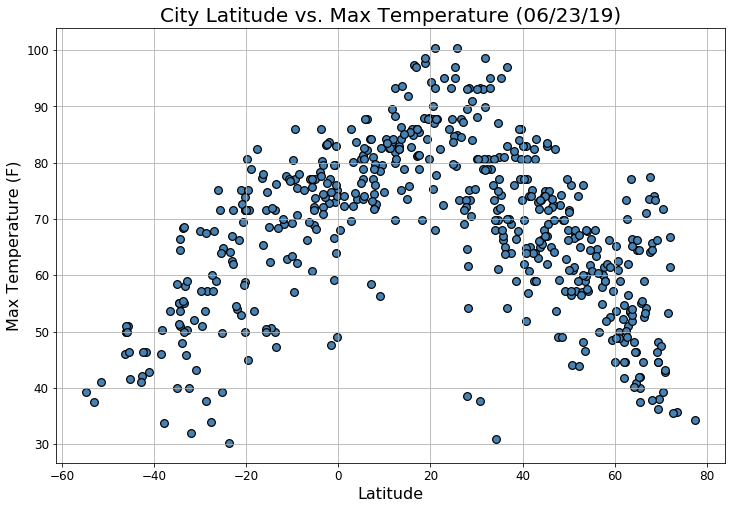

In [13]:
df.plot(kind = "scatter", x = ("Lat"), y = "Max Temp", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

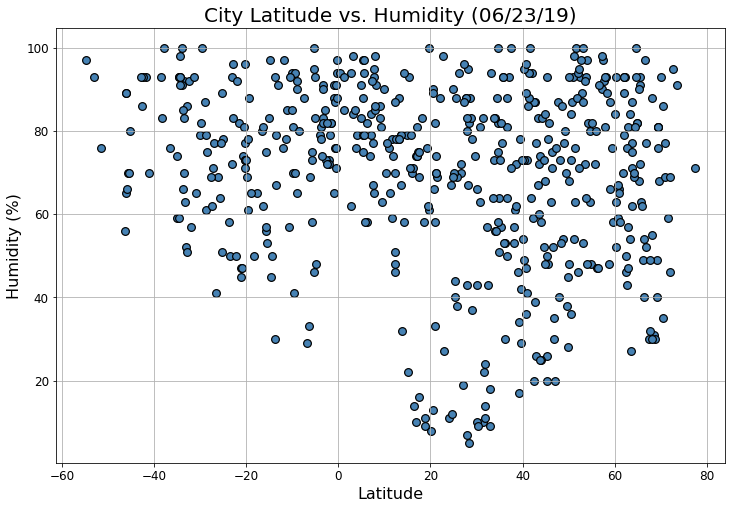

In [14]:
# sometimes record with report humidities well above 100 and this would significantly affect the scaling of my plot 
# so here I am removing data with that error

humid_df = df[df.Humidity <= 100]
humid_df.plot(kind = "scatter", x = ("Lat"), y = "Humidity", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Humidity ({today})", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

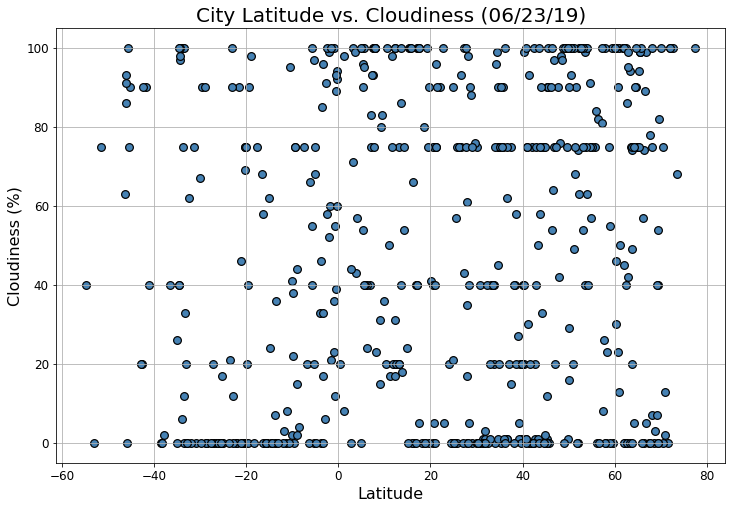

In [15]:
df.plot(kind = "scatter", x = ("Lat"), y = "Cloudiness", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

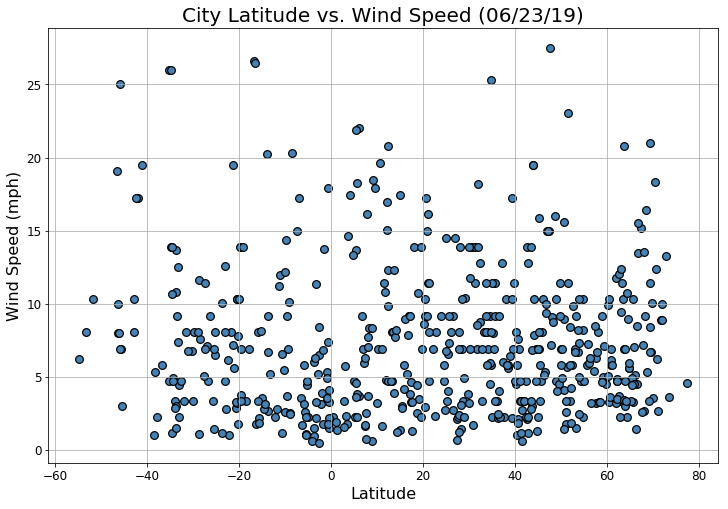

In [16]:
df.plot(kind = "scatter", x = ("Lat"), y = "Wind Speed", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Wind Speed ({today})", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)